# **Conformal Geoemtric Algebra - Part II**

## 1. Rounds

We have introduced points, flats and some transformations (e.g. translations, rotations). Let's
now introduced some more geometric objects that can be easily represented in our Conformal Model.

There are two ways to construct our geometric objects. We can do a direct construction
or construct via the dual. The choice depends usually on the use case. For example,
if you have three points that live in a circle, it's better to do a direct construction,
which is just the outer product of these points. If otherwise you know the radius and the
center, you can just use the dual construction.

### 1.1 Dual Planes

In the previous section, we have defined a general point as a null vector
$p = \alpha(n_o + \mathbf p + \frac{1}{2} \mathbf p^2 n_\infty)$.
A vector without the $n_o$ component defines the dual plane, i.e.

$$
\pi = \mathbf n + \delta n_\infty.
$$
It can be shown that $\pi$ is the dual of a plane normal to vector $\mathbf n$
and at a distance $\delta$ from the origin $n_o$. To show this, note that

$$
x \cdot \pi = (n_o + \mathbf x + \frac{1}{2}\mathbf x^2 n_\infty) \cdot
(\mathbf n + \delta n_\infty) = \mathbf x \cdot \mathbf n - \delta.
$$
This equation is zero exactly when $x$ lies in a plane with
normal vector $\mathbf n$ and at a distance $\frac{\delta}{||\mathbf n||}$ from the origin.

In [48]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

include("./auxiliary.jl")

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`


translate (generic function with 3 methods)

In [49]:
p = point(0,1,0)
q = point(2,3,0)
r = point(0,1,1)

Π = p ∧ q ∧ r ∧ n∞

weight = norm(n∞ ⨼ (no ⨼ Π))
A = n∞ ⨼ (no ⨼ Π)/weight
n = edual(A)

d_vec = getblades((no ⨼ Π) / Π)
d = F(d_vec)

δ = norm(d_vec)

Π⁺ = n + δ * n∞

-0.7071067811865475×e1+0.7071067811865475×e2-0.7071067811865478×e₊+0.7071067811865478×e₋ ∈ Cl(4, 1, 0)

In [50]:
@show F(d) ∧ cdual(Π⁺)
@show round(p ∧ cdual(Π⁺);digits=4);
@show round(q ∧ cdual(Π⁺);digits=4);
@show round(r ∧ cdual(Π⁺);digits=4);
@show d ∧ A ∧ n∞ == cdual(Π⁺);

F(d) ∧ cdual(Π⁺) = -0.7071067811865478×e1e2e3e₊e₋ ∈ Cl(4, 1, 0)
round(p ∧ cdual(Π⁺); digits = 4) = 0
round(q ∧ cdual(Π⁺); digits = 4) = 0
round(r ∧ cdual(Π⁺); digits = 4) = 0
(d ∧ A) ∧ n∞ == cdual(Π⁺) = true


### 1.2 Spheres and Circles and Rounds

For a radius $\rho$ the dual sphere located at the origin is constructed by

$$
\sigma = n_o - \frac{1}{2}\rho^2 n_\infty.
$$

We also know that the dual of a plane is just a vector $\pi = \mathbf n$ where $\mathbf n$ is normal to the plane
it represents. The dual of a circle with radius $\rho$ at the origin is given by the intersection
of $\sigma$ with $\pi$. Note that the intersection of dual blades is given by the outer product,
thus the dual circle at the origin is

$$
\text{Dual Circle at the origin: }\kappa = \sigma \wedge \pi = (n_o - \frac{1}{2}\rho^2 n_\infty) \wedge \mathbf n.
$$

A round is the collection of all objects constructed in this manner, by using

$$
\text{Dual Round at the origin: }(n_o - \frac{1}{2}\rho^2 n_\infty) \mathbf E_k^\star (-1)^n,
$$
where $\mathbf E_k$ is a $k$-blade.

Note that, the translation of an euclidean $k$-blade is

$$
\text{T}_\mathbf p  [\mathbf E_k] = (1 - \mathbf p n_\infty /2)
\mathbf E_k
(1 - \mathbf p n_\infty /2) = - p \rfloor (n_\infty \mathbf E_k).
$$

Hence, if we translate our round we have:

$$
\text{T}_\mathbf p [(n_o - \frac{1}{2}\rho^2 n_\infty) \mathbf E_k] = 
(c - \frac{1}{2}\rho^2 n_\infty)(-c \rfloor (n_\infty \mathbf E_k)).
$$

These were the dual constructions. The direct construction is as simple. For fours points $p, q, r, s$ we have:

$$
\text{Sphere : } p \wedge q \wedge r \wedge s \\
\text{Circle : } p \wedge q \wedge r.
$$

Another possible construction of the direct round is
$$
\mathbb T_\mathbf p \left[\right(n_o + \frac{1}{2}\rho n_\infty \left)\mathbf E\right] =
\left(c + \frac{1}{2} \rho^2 n_\infty \right)
\wedge
\left(
- c \rfloor (\hat{\mathbf E} n_\infty).
\right)
$$

Therefore, we can compute the translated round by either applying the translation rotor or using the formula.

It's important to note that for a direct **sphere** e.g. $\Sigma = p \wedge q \wedge r \wedge s$, the dual
$\Sigma^*$ is not $(c - \frac{1}{2} \rho^2 n_\infty)$, but
$\alpha(c - \frac{1}{2} \rho^2 n_\infty)$, where $\alpha$ is a scaling factor.
We can compute this $\alpha$ by

$$
\alpha =  - n_\infty \rfloor (p \wedge q \wedge r \wedge s)^*.
$$

The direction of a round, i.e. $\mathbf E$  can be computed by
$$
-(n_\infty \rfloor X) \wedge n_\infty.
$$

The location (center) is

$$
\frac{X}{-n_\infty  \rfloor X} \quad \text{or} \quad
\frac{-X n_\infty X}{2(-n_\infty  \rfloor X)^2}.
$$

The radius is

$$
\rho^2 = \frac{X \hat{X}}{(n_\infty \rfloor X)^2}.
$$

### Defining Spheres

Let's define the dual sphere and check if the points lay in it.

In [73]:
ρ = 2
σ⁺ = (no - ρ^2 * n∞ /2)

θ = 0:0.5:2π
xs = point.(ρ .* cos.(θ),ρ .* sin.(θ))
println(round(mapreduce(x-> abs(scalar(x ⋅ σ⁺)), + , xs)))
@show r = √scalar(-(σ⁺ * grin(σ⁺))/((n∞ ⨼ σ⁺)^2));


a = point(2,0,0)
b = point(0,2,0)
c = point(0,0,2)
d = point(-2,0,0)

σ = a ∧ b ∧ c ∧ d

println(round(mapreduce(x-> abs(scalar(x ∧ σ)), + , xs)))
@show r = √scalar((σ * grin(σ))/((n∞ ⨼ σ)^2));

0.0
r = √(scalar(-(σ⁺ * grin(σ⁺)) / (n∞ ⨼ σ⁺) ^ 2)) = 2.0
0.0
r = √(scalar((σ * grin(σ)) / (n∞ ⨼ σ) ^ 2)) = 2.0


Note that the dual and the dual of the direct constructions are not the same multivector.

In [74]:
@show σ⁺
@show σ;

σ⁺ = +2.5×e₊-1.5×e₋ ∈ Cl(4, 1, 0)
σ = -24.0×e1e2e3e₊-40.0×e1e2e₋e3 ∈ Cl(4, 1, 0)


Let's compute $\alpha$ and show how to make them equal.

In [75]:
α = -n∞ ⨼ cdual(a ∧ b ∧ c ∧ d)
@show α*σ⁺ == cdual(σ)
@show -α*cdual(σ⁺) ≈ σ;

α * σ⁺ == cdual(σ) = true
-α * cdual(σ⁺) ≈ σ = true


We've worked with centered spheres. Let's move the center.

In [76]:
a = point(2,1,1)
b = point(0,3,1)
c = point(0,1,3)
d = point(-2,1,1)

σ = a ∧ b ∧ c ∧ d
@show r = √scalar((σ * grin(σ))/((n∞ ⨼ σ)^2));

center  = point(0,1,1)

σ⁺ = (center - ρ^2 * n∞/2)
@show r = √scalar((σ * grin(σ))/((n∞ ⨼ σ)^2));
θ = 0:0.5:2π

xs = point.(ρ .* cos.(θ),ρ .* sin.(θ) .+ 1, 1)

println(round(mapreduce(x-> abs(scalar(x ∧ σ)), + , xs)))
println(round(mapreduce(x-> abs(scalar(x ⋅ σ⁺)), + , xs)))

α = -n∞ ⨼ cdual(σ)
@show α*σ⁺ == cdual(σ)

@show -(1/2)*(σ * n∞ * σ)/((n∞ ⨼ σ)^2) ≈ center
getblades(σ / (-n∞ ⨼ σ)) ≈ 1cl.e2 + 1cl.e3

r = √(scalar((σ * grin(σ)) / (n∞ ⨼ σ) ^ 2)) = 2.0
r = √(scalar((σ * grin(σ)) / (n∞ ⨼ σ) ^ 2)) = 2.0
0.0
0.0
α * σ⁺ == cdual(σ) = true
(-(1 / 2) * (σ * n∞ * σ)) / (n∞ ⨼ σ) ^ 2 ≈ center = true


true

Note that the first (and longer) formula to get the center returns an actual point in the conformal model. The second
formula requires that we extract the 1-grades.

### Defining Circles

Let's do a direct construction using 3 points.

In [77]:
p = point(1,0,0)
q = point(0,1,0)
r = point(-1,0,0)

C = p ∧ q ∧ r

θ = 0:0.5:2π
xs = point.(1 .* cos.(θ),1 .* sin.(θ) .+ 1, 1)


# Checking whether every point lies in the circle. For this, the sum has to be 0.0
println(round(mapreduce(x-> abs(scalar(x ∧ C)), + , xs)))

0.0


The direct construction worked. Let's now construct via the dual by providing a radius and a center point.

In [78]:
c = point(0,0,0)
ρ = 1
n = cl.e3 # This is the normal to the 2D Eucldiean space

C⁺ = (c - n∞/2) ∧ n
C  = cdual(C⁺)

# Checking whether every point lies in the circle. For this, the sum has to be 0.0
println(round(mapreduce(x-> abs(scalar(x ∧ C)), + , xs)))

0.0


The dual worked, but we can check that the original circle
$p \wedge q \wedge r \neq ((c - \rho^2 n_\infty/2) \wedge \mathbf n)^*$.
The reason for this is the weight of the blade.

We have a formula to compute the weight of spheres, but not of circle.
This can be done by first obtaining the direction of the round, which is
$\mathbf E n_\infty$, where $\mathbf E$ is the Euclidean plane.

We have the formula
to get this direction, but the weight is actually the norm of $\mathbf E$ and
not of $\mathbf E n_\infty$. This can be obtained using:

$$
\sqrt{|q \rfloor(\mathbf E n_\infty)|^2},
$$
where $q$ is a point of reference. We can change $q$ to $n_o$.

In [79]:
C₂ = p ∧ q ∧ r
direction = (- (n∞ ⨼ C₂) ∧ n∞) # E n∞
α = √norm_sqr(no ⨼ direction)

2.0

In [80]:
α * C == C₂

true

Our circle was centered. Let's now do an example with a circle not centered, and let's compute the direction, location and radius of the circle.

In [83]:
c = point(1,1,0)
ρ = 2
n = cl.e3 # This is the normal to the 2D Eucldiean space
E = edual(n / norm(n))

C = (no + ρ^2 * n∞/2) * E


@show ρ_sqr = scalar(C*grin(C)/(n∞ ⨼ C)^2);
@show -(1/2)*(C * n∞ * C)/((n∞ ⨼ C)^2) ≈ no;

ρ_sqr = scalar((C * grin(C)) / (n∞ ⨼ C) ^ 2) = 4.0
(-(1 / 2) * (C * n∞ * C)) / (n∞ ⨼ C) ^ 2 ≈ no = true


Let's translate the original circle using both the formula and the translation rotor. 

In [86]:
Ct = (c + ρ^2 * n∞/2) ∧ (-c ⨼ (grin(E)*n∞))

@show ρ_sqr = scalar(Ct*grin(Ct)/(n∞ ⨼ Ct)^2);
@show -(1/2)*(Ct * n∞ * Ct)/((n∞ ⨼ Ct)^2) == c;

ρ_sqr = scalar((Ct * grin(Ct)) / (n∞ ⨼ Ct) ^ 2) = 4.0
(-(1 / 2) * (Ct * n∞ * Ct)) / (n∞ ⨼ Ct) ^ 2 == c = true


In [88]:
Ct = translate(C, point(1,1,0))

@show ρ_sqr = scalar(Ct*grin(Ct)/(n∞ ⨼ Ct)^2);
@show -(1/2)*(Ct * n∞ * Ct)/((n∞ ⨼ Ct)^2) == c;

ρ_sqr = scalar((Ct * grin(Ct)) / (n∞ ⨼ Ct) ^ 2) = 4.0
(-(1 / 2) * (Ct * n∞ * Ct)) / (n∞ ⨼ Ct) ^ 2 == c = true


## 1.3 Tangents

Consider a circle with intersection zero. This can be obtained by intersecting to spheres such that they only slightly 
touch each other. This cretes a tangent object:

$$
\text{direct tangent at the origin: } n_o \wedge \mathbf A_k,
$$
where $\mathbf A_k$ is the Euclidean $k$-blade.

The general form of the direct tangent is *not* $p \wedge \mathbf A_k$. The correct form
is obtained by applying the translation rotor to the tangent at the origin, and it gives:

$$
p \wedge (-p \rfloor \widehat{\mathbf A_k} n_\infty).
$$

The Conformal Model also gives tangents at points of a flat without having to take a derivative.

$$
\text{Tangent to }X \text{ at point }p: \ p\rfloor \hat{X}.
$$

In [ ]:
n = cl.e1 - cl.e2
t = no ∧ n

t /(-n∞ ⨼ t) ≈ no

Let's define a circle and take the tangent on some points.

In [ ]:
c = cdual((point(0,0,0) - n∞/2) ∧ (cl.e1 ∧ cl.e2))

p = point(0,1,0)

p ∧ c

In [ ]:
c = point(1,0,0) ∧ 

## 1.4 Parameters from Objects

As we have done for the other objects, we want to extract information from the blades already constructed, e.g.
given a sphere $\sigma$, what is the radius and postion?

For a round $X$:
$$
\begin{align}
&\text{location: } \frac{X}{- n_\infty \rfloor X} \quad \text{or } -\frac{1}{2} \frac{X n_\infty X}{(n_\infty \rfloor X)^2} \\
&\text{direction: } -(n_\infty \rfloor X) \wedge n_\infty \\
&\rho^2 : \frac{X \hat{X}}{(n_\infty \rfloor X)^2}.
\end{align}
$$


For a tangent $X$:
    $$
\begin{align}
&\text{location: } \frac{X}{- n_\infty \rfloor X} \\
&\text{direction: } -(n_\infty \rfloor X) \wedge n_\infty.
\end{align}
$$

### 1.5 Carriers and Surround

A *carrier* of an element is the smallest grade flat that contains it.
Thus, the carrier of a flat is itself. For a round $\Sigma$, the carrier is
$\Sigma \wedge n_\infty$, which, in 3D, would be the whole space.

For a round $\Sigma$, the surround of $\Sigma$ is the smallest sphere containing it, and it's given by:
$$
\frac{\Sigma}{\Sigma \wedge n_\infty}.
$$

The surround for the dual round $\sigma$ is

$$
(-1)^k \frac{\hat{\sigma}}{n_\infty \rfloor \sigma},
$$
where $k$ is the grade of the carrier.

Note that a round can be factorized by the surround and the carrier:

$$
\frac{\Sigma}{\Sigma \wedge n_\infty}, \quad 
\frac{\hat{\sigma}}{n_\infty \rfloor \sigma} (n_\infty \rfloor \sigma).
$$

For a point pair $p \wedge q$, the surround is
$$
\frac{p \wedge q}{p \wedge q \wedge n_\infty} = -\frac{1}{2}(p+q+(p \cdot q) n_\infty).
$$

### 1.6 Euclidean Projections

The projection of a blade $X$ onto a blade $P$ is 
$$
X \mapsto (X \rfloor P) / P.
$$

Note that this projection always returns a blade in our model. Hence, it does not always work as
the "usual projection. For example, the projection of a circle in a plane will result
in another circle, and not in an ellipse. Check the image below from Dorst (Figure 15.10 from the book):

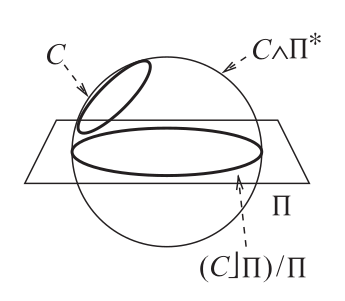

In this image, the circle $C$ is projected onto plane $\Pi$.

Note that this projection can be done with elements such as tangents, lines, circles, spheres, and so on.